In [1]:
# create the configuration of the low-fidelity model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

In [2]:
# read the data
data = pd.read_pickle("data.pkl")
# extract dataset
samples = data["samples"]
hf_samples = samples["hf"]
lf_samples = samples["lf"]
hf_responses = data["responses_lf1"]["hf"]
responses_lf1 = data["responses_lf1"]
responses_lf2 = data["responses_lf2"]
responses_lf3 = data["responses_lf3"]
test_samples = data["test_samples"]
test_hf_responses_noiseless = data["test_hf_responses_noiseless"]
test_hf_responses = data["test_hf_responses"]
test_lf1_responses = data["test_lf1_responses"]
test_lf2_responses = data["test_lf2_responses"]
test_lf3_responses = data["test_lf3_responses"]
# normalize the responses
hf_responses_mean = hf_responses.mean().numpy()
hf_responses_std = hf_responses.std().numpy()
hf_responses_scaled = (hf_responses.clone() -
                       hf_responses_mean) / hf_responses_std

In [3]:
# load the trained model
with open("sf_gpr.pkl", "rb") as f:
    gpr_model = torch.load(f)
# bnn_model_50
with open("sf_bnn_model_50_50.pkl", "rb") as f:
    bnn_model_50 = torch.load(f)
# bnn_model_128
with open("sf_bnn_model_128_128.pkl", "rb") as f:
    bnn_model_128 = torch.load(f)
# bnn_model_256
with open("sf_bnn_model_256_256.pkl", "rb") as f:
    bnn_model_256 = torch.load(f)
# bnn_model_512
with open("sf_bnn_model_512_512.pkl", "rb") as f:
    bnn_model_512 = torch.load(f)
# bnn_model_1024
with open("sf_bnn_model_1024_1024.pkl", "rb") as f:
    bnn_model_1024 = torch.load(f)

In [4]:
# prediction on each model
# gpr
sf_pred, sf_std = gpr_model.predict(test_samples.numpy(), return_std=True)
# bnn_50
(bnn_y_50,
 bnn_epistemic_50,
 bnn_total_unc_50,
 bnn_aleatoric_50) = bnn_model_50.predict(x=test_samples)
bnn_y = bnn_y_50 * hf_responses_std + hf_responses_mean
bnn_total_unc_50 = bnn_total_unc_50 * hf_responses_std
bnn_epistemic_50 = bnn_epistemic_50 * hf_responses_std
bnn_aleatoric_50 = bnn_aleatoric_50 * hf_responses_std
# bnn_128
(bnn_y_128,
 bnn_epistemic_128,
 bnn_total_unc_128,
 bnn_aleatoric_128) = bnn_model_128.predict(x=test_samples)
bnn_y_128 = bnn_y_128 * hf_responses_std + hf_responses_mean
bnn_total_unc_128 = bnn_total_unc_128 * hf_responses_std
bnn_epistemic_128 = bnn_epistemic_128 * hf_responses_std
bnn_aleatoric_128 = bnn_aleatoric_128 * hf_responses_std
# bnn_256
(bnn_y_256,
 bnn_epistemic_256,
 bnn_total_unc_256,
 bnn_aleatoric_256) = bnn_model_256.predict(x=test_samples)
bnn_y_256 = bnn_y_256 * hf_responses_std + hf_responses_mean
bnn_total_unc_256 = bnn_total_unc_256 * hf_responses_std
bnn_epistemic_256 = bnn_epistemic_256 * hf_responses_std
bnn_aleatoric_256 = bnn_aleatoric_256 * hf_responses_std
# bnn_512
(bnn_y_512,
 bnn_epistemic_512,
 bnn_total_unc_512,
 bnn_aleatoric_512) = bnn_model_512.predict(x=test_samples)
bnn_y_512 = bnn_y_512 * hf_responses_std + hf_responses_mean
bnn_total_unc_512 = bnn_total_unc_512 * hf_responses_std
bnn_epistemic_512 = bnn_epistemic_512 * hf_responses_std
bnn_aleatoric_512 = bnn_aleatoric_512 * hf_responses_std
# bnn_1024
(bnn_y_1024,
 bnn_epistemic_1024,
 bnn_total_unc_1024,
 bnn_aleatoric_1024) = bnn_model_1024.predict(x=test_samples)
bnn_y_1024 = bnn_y_1024 * hf_responses_std + hf_responses_mean
bnn_total_unc_1024 = bnn_total_unc_1024 * hf_responses_std
bnn_epistemic_1024 = bnn_epistemic_1024 * hf_responses_std
bnn_aleatoric_1024 = bnn_aleatoric_1024 * hf_responses_std

#

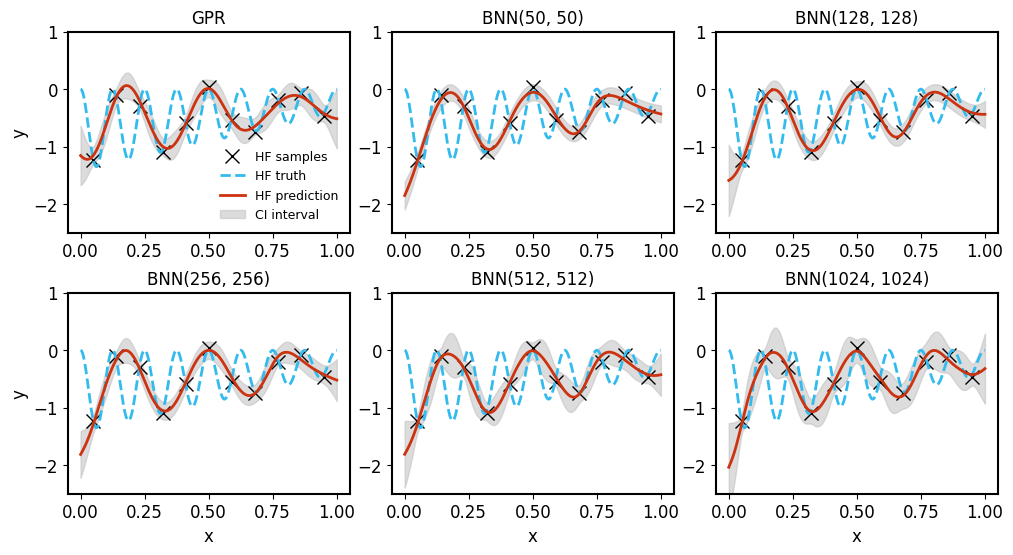

In [25]:
# plot the results using a figure with 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
# plot hf samples
axs[0, 0].plot(hf_samples.numpy(), hf_responses.numpy(), "kx", linewidth=2,
               markersize=10,
               label="HF samples")
axs[0, 0].plot(test_samples.numpy(), test_hf_responses_noiseless.numpy(),
               "--",
               color="#33BBEE",
               linewidth=2,
               label="HF truth",)

axs[0, 0].plot(test_samples.numpy(), sf_pred, "-", color="#CC3311",
               linewidth=2,
               label="HF prediction")
axs[0, 0].fill_between(test_samples.numpy().flatten(),
                       (sf_pred - 2 * sf_std).flatten(),
                       (sf_pred + 2 * sf_std).flatten(),
                       alpha=0.5,
                       color="#BBBBBB",
                       label="CI interval")

axs[0, 0].set_title("GPR")

# plot bnn_50
axs[0, 1].plot(hf_samples.numpy(), hf_responses.numpy(), "kx", linewidth=2,
               markersize=10,
               label="HF samples")
axs[0, 1].plot(test_samples.numpy(), test_hf_responses_noiseless.numpy(),
               "--",
               color="#33BBEE",
               linewidth=2,
               label="HF truth",)
axs[0, 1].plot(test_samples.numpy(), bnn_y, "-", color="#CC3311",
               linewidth=2,
               label="HF prediction")
axs[0, 1].fill_between(test_samples.numpy().flatten(),
                       (bnn_y - 2 * bnn_total_unc_50).flatten(),
                       (bnn_y + 2 * bnn_total_unc_50).flatten(),
                       alpha=0.5,
                       color="#BBBBBB",
                       label="CI interval")

axs[0, 1].set_title("BNN(50, 50)")

# plot bnn_128
axs[0, 2].plot(hf_samples.numpy(), hf_responses.numpy(), "kx", linewidth=2,
               markersize=10,
               label="HF samples")
axs[0, 2].plot(test_samples.numpy(), test_hf_responses_noiseless.numpy(),
               "--",
               color="#33BBEE",
               linewidth=2,
               label="HF truth",)
axs[0, 2].plot(test_samples.numpy(), bnn_y_128, "-", color="#CC3311",
               linewidth=2,
               label="HF prediction")
axs[0, 2].fill_between(test_samples.numpy().flatten(),
                       (bnn_y_128 - 2 * bnn_total_unc_128).flatten(),
                       (bnn_y_128 + 2 * bnn_total_unc_128).flatten(),
                       alpha=0.5,
                       color="#BBBBBB",
                       label="CI interval")
axs[0, 2].set_title("BNN(128, 128)")
# plot bnn_256
axs[1, 0].plot(hf_samples.numpy(), hf_responses.numpy(), "kx", linewidth=2,
               markersize=10,
               label="HF samples")
axs[1, 0].plot(test_samples.numpy(), test_hf_responses_noiseless.numpy(),
               "--",
               color="#33BBEE",
               linewidth=2,
               label="HF truth",)
axs[1, 0].plot(test_samples.numpy(), bnn_y_256, "-", color="#CC3311",
               linewidth=2,
               label="HF prediction")
axs[1, 0].fill_between(test_samples.numpy().flatten(),
                       (bnn_y_256 - 2 * bnn_total_unc_256).flatten(),
                       (bnn_y_256 + 2 * bnn_total_unc_256).flatten(),
                       alpha=0.5,
                       color="#BBBBBB",
                       label="CI interval")
axs[1, 0].set_title("BNN(256, 256)")
# plot bnn_512
axs[1, 1].plot(hf_samples.numpy(), hf_responses.numpy(), "kx", linewidth=2,
               markersize=10,
               label="HF samples")
axs[1, 1].plot(test_samples.numpy(), test_hf_responses_noiseless.numpy(),
               "--",
               color="#33BBEE",
               linewidth=2,
               label="HF truth",)
axs[1, 1].plot(test_samples.numpy(), bnn_y_512, "-", color="#CC3311",
               linewidth=2,
               label="HF prediction")
axs[1, 1].fill_between(test_samples.numpy().flatten(),
                       (bnn_y_512 - 2 * bnn_total_unc_512).flatten(),
                       (bnn_y_512 + 2 * bnn_total_unc_512).flatten(),
                       alpha=0.5,
                       color="#BBBBBB",
                       label="CI interval")
axs[1, 1].set_title("BNN(512, 512)")
# plot bnn_1024
axs[1, 2].plot(hf_samples.numpy(), hf_responses.numpy(), "kx", linewidth=2,
               markersize=10,
               label="HF samples")
axs[1, 2].plot(test_samples.numpy(), test_hf_responses_noiseless.numpy(),
               "--",
               color="#33BBEE",
               linewidth=2,
               label="HF truth",)
axs[1, 2].plot(test_samples.numpy(), bnn_y_1024, "-", color="#CC3311",
               linewidth=2,
               label="HF prediction")
axs[1, 2].fill_between(test_samples.numpy().flatten(),
                       (bnn_y_1024 - 2 * bnn_total_unc_1024).flatten(),
                       (bnn_y_1024 + 2 * bnn_total_unc_1024).flatten(),
                       alpha=0.5,
                       color="#BBBBBB",
                       label="CI interval")
axs[1, 2].set_title("BNN(1024, 1024)")
# set the axis labels x for the bottom row and y for the left column
for ii in range(2):
    for jj in range(3):
        if ii == 1:
            axs[ii, jj].set_xlabel("x", fontsize=12)
        if jj == 0:
            axs[ii, jj].set_ylabel("y", fontsize=12)
# set the line width of the axes
for ii in range(2):
    for jj in range(3):
        axs[ii, jj].spines["top"].set_linewidth(1.5)
        axs[ii, jj].spines["right"].set_linewidth(1.5)
        axs[ii, jj].spines["left"].set_linewidth(1.5)
        axs[ii, jj].spines["bottom"].set_linewidth(1.5)
        # font size of the axis
        axs[ii, jj].tick_params(axis="both", which="major", labelsize=12)

# set the limit of y for each row

for jj in range(3):
    axs[0, jj].set_ylim([-2.5, 1])
    axs[1, jj].set_ylim([-2.5, 1])

# set legende for the first subfigure  and put it outside the figure
axs[0, 0].legend(loc='lower right', frameon=False, fontsize=9)

# space of sub-figures
plt.subplots_adjust(wspace=0.15, hspace=0.3)
# save the figures
plt.savefig("single_fidelity_bnn_neural_nets.pdf",
            bbox_inches="tight", dpi=300)
plt.savefig("single_fidelity_bnn_neural_nets.png",
            bbox_inches="tight", dpi=300)
plt.show()